In [2]:
import pandas as pd

data = pd.read_csv('Cyber_security.csv')
print(data.head())

       Country        Region    CEI    GCI   NCSI    DDL
0  Afghanistan  Asia-Pasific  1.000   5.20  11.69  19.50
1      Albania        Europe  0.566  64.32  62.34  48.74
2      Algeria        Africa  0.721  33.95  33.77  42.81
3      Andorra        Europe    NaN  26.38    NaN    NaN
4       Angola        Africa    NaN  12.99   9.09  22.69


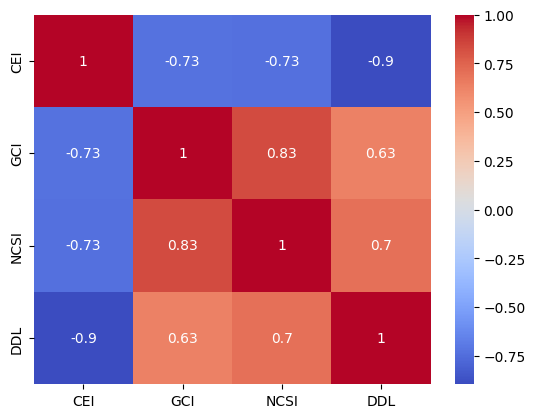

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 相関の確認
corr = data[['CEI', 'GCI', 'NCSI', 'DDL']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [4]:
data = pd.get_dummies(data, columns=['Region'], drop_first=True)

In [11]:
# 欠損値を持つ行を削除
data_cleaned = data.dropna()

# 削除後のデータ数を表示。元のデータ数は193。ヘッダーは含まない。
print(f"削除後のデータ数（行数）は {data_cleaned.shape[0]} 行です。")

削除後のデータ数（行数）は 104 行です。


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# データの分割
X = data.drop(['Country', 'CEI'], axis=1)
y = data['CEI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの訓練
model = LinearRegression()
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 評価
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.005823066851954328
